Files already downloaded and verified
epoch:  0


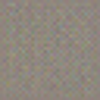

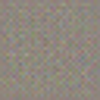

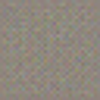

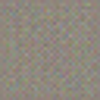

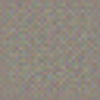

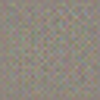

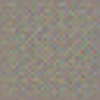

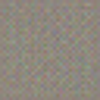

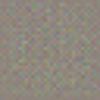

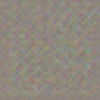

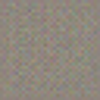

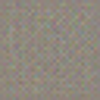

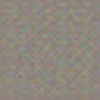

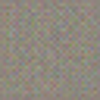

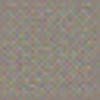

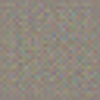

epoch:  1


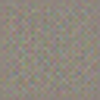

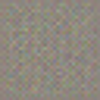

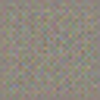

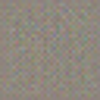

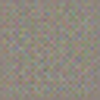

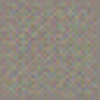

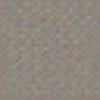

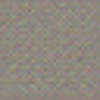

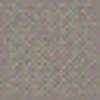

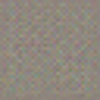

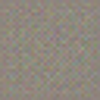

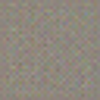

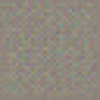

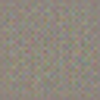

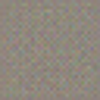

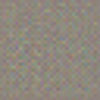

epoch:  2


KeyboardInterrupt: 

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
from IPython.display import display
import torchvision.transforms.functional as F

# Define the Generator and Discriminator networks
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim, channels):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 1024),
            nn.ReLU(),
            nn.Linear(1024, 8 * 8 * 128),
            nn.ReLU(),
            nn.Unflatten(1, (128, 8, 8)),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, channels, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

class Discriminator(nn.Module):
    def __init__(self, input_channels):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(input_channels, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(8 * 8 * 128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Hyperparameters
latent_dim = 100
image_size = 32 * 32
input_channels = 3  # Set to 3 for RGB
batch_size = 64
epochs = 50
lr = 0.0001

# Initialize networks, criterion, and optimizers
generator = Generator(latent_dim, image_size, input_channels)
discriminator = Discriminator(input_channels)
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=lr)
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr)

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(epochs):
    print("epoch: ", epoch)
    for i, (real_images, _) in enumerate(dataloader):
        batch_size = real_images.size(0)
        real_images = real_images.view(batch_size, input_channels, 32, 32)

        # Train Discriminator
        optimizer_d.zero_grad()
        real_labels = Variable(torch.ones(batch_size, 1))
        fake_labels = Variable(torch.zeros(batch_size, 1))

        outputs_real = discriminator(real_images)
        real_loss = criterion(outputs_real, real_labels)
        real_loss.backward()
        optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()
        z = Variable(torch.randn(batch_size, latent_dim))
        fake_images = generator(z)
        outputs_fake = discriminator(fake_images.detach())
        fake_loss = criterion(outputs_fake, fake_labels)
        fake_loss.backward()
        optimizer_g.step()

    # Generate and display images after each epoch
    z_sample = Variable(torch.randn(16, latent_dim))
    generated_images = generator(z_sample)

    # Convert and display the PIL images in the Colab notebook
    pil_images = []
    for img in generated_images:
      img = img.squeeze().cpu().detach().numpy().transpose(1, 2, 0)
      img = (img + 1) / 2.0  # Rescale values to [0, 1]
      pil_image = F.to_pil_image(torch.from_numpy((img * 255).astype(np.uint8)).permute(2, 0, 1)).resize((100,100))
      pil_images.append(pil_image)

    # Display the PIL images in the Colab notebook
    display(*pil_images)


In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
from IPython.display import display
import torchvision.transforms.functional as F

# Define the Generator and Discriminator networks
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim, channels):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 1024),
            nn.ReLU(),
            nn.Linear(1024, 8 * 8 * 128),
            nn.ReLU(),
            nn.Unflatten(1, (128, 8, 8)),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, channels, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

class Discriminator(nn.Module):
    def __init__(self, input_channels):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(input_channels, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(8 * 8 * 128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

def train(generator, discriminator, criterion, optimizer_g, optimizer_d, dataloader, epochs, latent_dim, input_channels):
    for epoch in range(epochs):
        print("epoch: ", epoch)
        for i, (real_images, _) in enumerate(dataloader):
            batch_size = real_images.size(0)
            real_images = real_images.view(batch_size, input_channels, 32, 32)

            # Train Discriminator
            optimizer_d.zero_grad()
            real_labels = Variable(torch.ones(batch_size, 1))
            fake_labels = Variable(torch.zeros(batch_size, 1))

            outputs_real = discriminator(real_images)
            real_loss = criterion(outputs_real, real_labels)
            real_loss.backward()
            optimizer_d.step()

            # Train Generator
            optimizer_g.zero_grad()
            z = Variable(torch.randn(batch_size, latent_dim))
            fake_images = generator(z)
            outputs_fake = discriminator(fake_images.detach())
            fake_loss = criterion(outputs_fake, fake_labels)
            fake_loss.backward()
            optimizer_g.step()

def generate_images(generator, latent_dim, num_images):
    z_sample = Variable(torch.randn(num_images, latent_dim))
    generated_images = generator(z_sample)

    # Convert and display the PIL images
    pil_images = []
    for img in generated_images:
        img = img.squeeze().cpu().detach().numpy().transpose(1, 2, 0)
        img = (img + 1) / 2.0  # Rescale values to [0, 1]
        pil_image = F.to_pil_image(torch.from_numpy((img * 255).astype(np.uint8)).permute(2, 0, 1)).resize((256, 256))
        pil_images.append(pil_image)

    # Display the PIL images
    display(*pil_images)

# Hyperparameters
latent_dim = 100
image_size = 32 * 32
input_channels = 3  # Set to 3 for RGB
batch_size = 16
epochs = 50
lr = 0.0002

# Initialize networks, criterion, and optimizers
generator = Generator(latent_dim, image_size, input_channels)
discriminator = Discriminator(input_channels)
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=lr)
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr)

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Train the model
train(generator, discriminator, criterion, optimizer_g, optimizer_d, dataloader, epochs, latent_dim, input_channels)

# Generate and display images
generate_images(generator, latent_dim, num_images=16)


 36%|███▌      | 60784640/170498071 [00:00<00:01, 74006277.76it/s]


KeyboardInterrupt: 

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
from IPython.display import display
import torchvision.transforms.functional as F

# Define the Generator and Discriminator networks
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim, channels):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 1024),
            nn.ReLU(),
            nn.Linear(1024, 8 * 8 * 128),
            nn.ReLU(),
            nn.Unflatten(1, (128, 8, 8)),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, channels, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

class Discriminator(nn.Module):
    def __init__(self, input_channels):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(input_channels, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(8 * 8 * 128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Training loop
def train(generator, discriminator, criterion, optimizer_g, optimizer_d, dataloader, epochs, device="cuda" if torch.cuda.is_available() else "cpu"):
    for epoch in range(epochs):
        print("epoch: ", epoch)
        for i, (real_images, _) in enumerate(dataloader):
            batch_size = real_images.size(0)
            real_images = real_images.to(device)  # Move data to device (CPU or GPU)
            real_images = real_images.view(batch_size, input_channels, 32, 32)

            # Train Discriminator
            optimizer_d.zero_grad()
            real_labels = Variable(torch.ones(batch_size, 1).to(device))
            fake_labels = Variable(torch.zeros(batch_size, 1).to(device))

            outputs_real = discriminator(real_images)
            real_loss = criterion(outputs_real, real_labels)
            real_loss.backward()
            optimizer_d.step()

            # Train Generator
            optimizer_g.zero_grad()
            z = Variable(torch.randn(batch_size, latent_dim, device=device))
            fake_images = generator(z)
            outputs_fake = discriminator(fake_images.detach())
            fake_loss = criterion(outputs_fake, fake_labels)
            fake_loss.backward()
            optimizer_g.step()

# Generate and display images
def generate_images(generator, latent_dim, num_images, device="cuda" if torch.cuda.is_available() else "cpu"):
    z_sample = Variable(torch.randn(num_images, latent_dim, device=device))
    generated_images = generator(z_sample)

    # Convert and display the PIL images
    pil_images = []
    for img in generated_images:
        img = img.squeeze().cpu().detach().numpy().transpose(1, 2, 0)
        img = (img + 1) / 2.0  # Rescale values to [0, 1]
        pil_image = F.to_pil_image(torch.from_numpy((img * 255).astype(np.uint8)).permute(2, 0, 1)).resize((256,256))


Files already downloaded and verified
epoch:  0


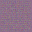

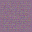

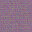

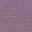

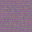

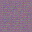

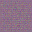

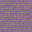

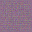

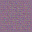

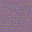

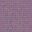

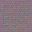

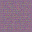

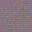

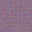

epoch:  1


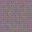

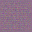

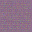

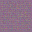

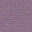

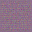

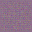

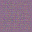

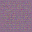

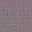

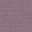

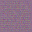

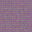

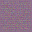

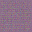

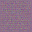

epoch:  2


KeyboardInterrupt: 

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
from IPython.display import display
import torchvision.transforms.functional as F

# Define the Generator and Discriminator networks
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim, channels):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 8 * 8 * 128),
            nn.LeakyReLU(0.2),
            nn.Unflatten(1, (128, 8, 8)),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.ConvTranspose2d(64, channels, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

class Discriminator(nn.Module):
    def __init__(self, input_channels):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(input_channels, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(8 * 8 * 128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Hyperparameters
latent_dim = 100
image_size = 32 * 32
input_channels = 3  # Set to 3 for RGB
batch_size = 64
epochs = 50
lr = 0.0001

# Initialize networks, criterion, and optimizers
generator = Generator(latent_dim, image_size, input_channels)
discriminator = Discriminator(input_channels)
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=lr)
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr)

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(epochs):
    print("epoch: ", epoch)
    for i, (real_images, _) in enumerate(dataloader):
        batch_size = real_images.size(0)
        real_images = real_images.view(batch_size, input_channels, 32, 32)

        # Train Discriminator
        optimizer_d.zero_grad()
        real_labels = Variable(torch.ones(batch_size, 1))
        fake_labels = Variable(torch.zeros(batch_size, 1))

        outputs_real = discriminator(real_images)
        real_loss = criterion(outputs_real, real_labels)
        real_loss.backward()
        optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()
        z = Variable(torch.randn(batch_size, latent_dim))
        fake_images = generator(z)
        outputs_fake = discriminator(fake_images.detach())
        fake_loss = criterion(outputs_fake, fake_labels)
        fake_loss.backward()
        optimizer_g.step()

    # Generate and display images after each epoch
    z_sample = Variable(torch.randn(16, latent_dim))
    generated_images = generator(z_sample)

    # Convert and display the PIL images in the Colab notebook
    pil_images = []
    for img in generated_images:
      img = img.squeeze().cpu().detach().numpy().transpose(1, 2, 0)
      img = (img + 1) / 2.0  # Rescale values to [0, 1]
      pil_image = F.to_pil_image(torch.from_numpy((img * 255).astype(np.uint8)).permute(2, 0, 1)).resize((100,100))
      pil_images.append(pil_image)

    # Display the PIL images in the Colab notebook
    display(*pil_images)


Files already downloaded and verified
epoch:  0


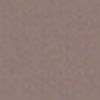

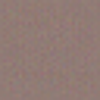

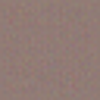

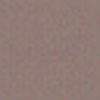

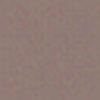

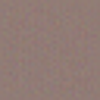

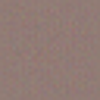

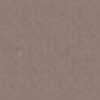

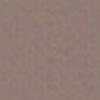

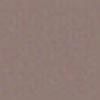

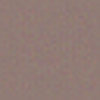

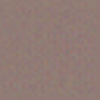

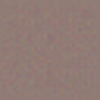

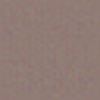

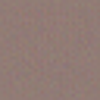

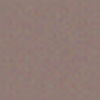

epoch:  1


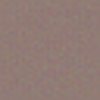

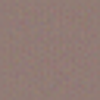

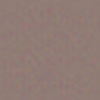

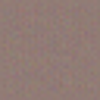

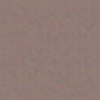

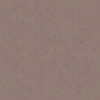

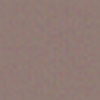

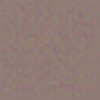

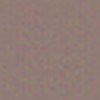

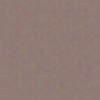

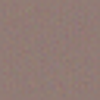

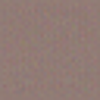

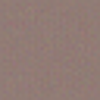

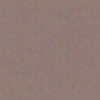

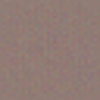

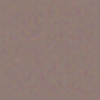

epoch:  2


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
from IPython.display import display
import torchvision.transforms.functional as F
import numpy as np

# Generator with Leaky ReLU
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim, channels):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 8 * 8 * 128),
            nn.LeakyReLU(0.2),
            nn.Unflatten(1, (128, 8, 8)),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.utils.spectral_norm(nn.ConvTranspose2d(64, channels, kernel_size=4, stride=2, padding=1)),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_channels):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.utils.spectral_norm(nn.Conv2d(input_channels, 64, kernel_size=4, stride=2, padding=1)),
            nn.LeakyReLU(0.2),
            nn.utils.spectral_norm(nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(8 * 8 * 128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Hyperparameters
latent_dim = 100
image_size = 32 * 32
input_channels = 3  # Set to 3 for RGB
batch_size = 64
epochs = 50
lr = 0.0001

# Initialize networks, criterion, and optimizers
generator = Generator(latent_dim, image_size, input_channels)
discriminator = Discriminator(input_channels)
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=lr)
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr)

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(epochs):
    print("epoch: ", epoch)
    for i, (real_images, _) in enumerate(dataloader):
        batch_size = real_images.size(0)
        real_images = real_images.view(batch_size, input_channels, 32, 32)

        # Train Discriminator
        optimizer_d.zero_grad()
        real_labels = Variable(torch.ones(batch_size, 1))
        fake_labels = Variable(torch.zeros(batch_size, 1))

        outputs_real = discriminator(real_images)
        real_loss = criterion(outputs_real, real_labels)
        real_loss.backward()
        optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()
        z = Variable(torch.randn(batch_size, latent_dim))
        fake_images = generator(z)
        outputs_fake = discriminator(fake_images.detach())
        fake_loss = criterion(outputs_fake, fake_labels)
        fake_loss.backward()
        optimizer_g.step()

    # Generate and display images after each epoch
    z_sample = Variable(torch.randn(16, latent_dim))
    generated_images = generator(z_sample)

    # Convert and display the PIL images in the Colab notebook
    pil_images = []
    for img in generated_images:
        img = img.squeeze().cpu().detach().numpy().transpose(1, 2, 0)
        img = (img + 1) / 2.0  # Rescale values to [0, 1]
        pil_image = F.to_pil_image(torch.from_numpy((img * 255).astype(np.uint8)).permute(2, 0, 1)).resize((100,100))
        pil_images.append(pil_image)

    # Display the PIL images in the Colab notebook
    display(*pil_images)



Files already downloaded and verified
Epoch [0/100] | Discriminator Loss: 5.933462142944336 | Generator Loss: -0.6871324777603149


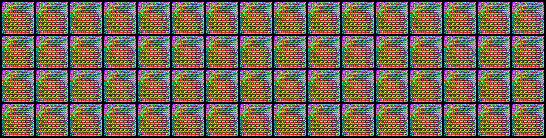

KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
from IPython.display import display
import torchvision.transforms.functional as F
import numpy as np

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Weight Initialization
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

# Generator with Leaky ReLU
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim, channels):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 8 * 8 * 128),
            nn.LeakyReLU(0.2),
            nn.Unflatten(1, (128, 8, 8)),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.ConvTranspose2d(64, channels, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_channels):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(input_channels, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(8 * 8 * 128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Hyperparameters
latent_dim = 100
image_size = 32 * 32
input_channels = 3
batch_size = 64
epochs = 100
lr = 0.0001
n_critic = 5  # Number of iterations for discriminator
lambda_gp = 10  # Gradient penalty coefficient

# Initialize networks, criterion, and optimizers
generator = Generator(latent_dim, image_size, input_channels).to(device)
discriminator = Discriminator(input_channels).to(device)
generator.apply(weights_init)
discriminator.apply(weights_init)
optimizer_g = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.9))
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.9))

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(epochs):


    for i, (real_images, _) in enumerate(dataloader):
        batch_size = real_images.size(0)
        real_images = real_images.view(batch_size, input_channels, 32, 32).to(device)

        # Train Discriminator
        for _ in range(n_critic):
            optimizer_d.zero_grad()

            # Compute gradient penalty
            eps = torch.rand(batch_size, 1, 1, 1).to(device)
            x_hat = eps * real_images + (1 - eps) * generator(Variable(torch.randn(batch_size, latent_dim)).to(device)).detach()
            x_hat.requires_grad = True
            d_x_hat = discriminator(x_hat)
            gradients = torch.autograd.grad(outputs=d_x_hat, inputs=x_hat, grad_outputs=torch.ones(d_x_hat.size()).to(device),
                                            create_graph=True, retain_graph=True)[0]
            gradients = gradients.view(batch_size, -1)
            grad_penalty = lambda_gp * ((gradients.norm(2, dim=1) - 1) ** 2).mean()

            # Compute discriminator loss
            d_real = discriminator(real_images)
            noise = Variable(torch.randn(batch_size, latent_dim)).to(device)
            fake_images = generator(noise)
            d_fake = discriminator(fake_images.detach())
            d_loss = -(torch.mean(d_real) - torch.mean(d_fake)) + grad_penalty

            d_loss.backward()
            torch.nn.utils.clip_grad_norm_(discriminator.parameters(), max_norm=1.0)
            optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()
        noise = Variable(torch.randn(batch_size, latent_dim)).to(device)
        fake_images = generator(noise)
        g_fake = discriminator(fake_images)
        g_loss = -torch.mean(g_fake)
        g_loss.backward()
        optimizer_g.step()

    print(f"Epoch [{epoch}/{epochs}] | Discriminator Loss: {d_loss.item()} | Generator Loss: {g_loss.item()}")

    # Generate and display images after each epoch
    z_sample = Variable(torch.randn(64, latent_dim)).to(device)
    generated_images = generator(z_sample)

    # Convert and display the PIL images in a grid
    image_grid = torchvision.utils.make_grid(generated_images, nrow=16)  # Change nrow to adjust grid dimensions

    # Convert the image grid to a PIL image
    pil_image = F.to_pil_image(image_grid)

    # Display the PIL image
    display(pil_image)